In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = os.listdir('/kaggle/input/isic-2019/ISIC - 2019/train')
print(labels)

['Melanoma', 'Vascular lesion', 'Melanocytic nevus', 'Actinic keratosis', 'Squamous cell carcinoma', 'Benign keratosis', 'Basal cell carcinoma', 'Dermatofibroma']


In [3]:
train_path = '/kaggle/input/isic-2019/ISIC - 2019/train/{0}/'
test_path = '/kaggle/input/isic-2019/ISIC - 2019/test/{0}/'
num_cls = len(labels)

In [4]:
num = []
for label in labels:
    path = train_path.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 MELANOMA
there are  3812  images in  Melanoma class

 VASCULAR LESION
there are  202  images in  Vascular lesion class

 MELANOCYTIC NEVUS
there are  10979  images in  Melanocytic nevus class

 ACTINIC KERATOSIS
there are  716  images in  Actinic keratosis class

 SQUAMOUS CELL CARCINOMA
there are  541  images in  Squamous cell carcinoma class

 BENIGN KERATOSIS
there are  2215  images in  Benign keratosis class

 BASAL CELL CARCINOMA
there are  2820  images in  Basal cell carcinoma class

 DERMATOFIBROMA
there are  206  images in  Dermatofibroma class


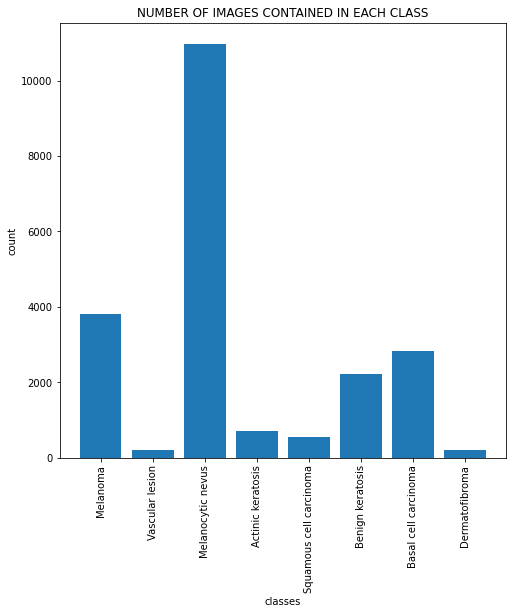

In [5]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [6]:
x_data =[]
y_data = []
for label in labels:
    path = train_path.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (64,64))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [7]:
import albumentations as A
transform = A.Compose([
            A.Rotate(limit=40),
            A.RandomBrightness(limit=0.1),
            A.ImageCompression(quality_lower=85, quality_upper=100, p=0.5),
            A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
            A.RandomContrast(limit=0.2, p=0.5),
            A.HorizontalFlip(),
        ])

for label in labels:
    path = train_path.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        # Augment an image
        transformed = transform(image=image)
        transformed_image = transformed["image"]
        image_resized = cv2.resize(transformed_image, (64,64))
        x_data.append(np.array(image_resized))
        y_data.append(label)

/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1802: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1828: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


In [8]:
num = []
for label in labels:
    k = 0
    print('\n', label.upper())
    for image_path in x_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 MELANOMA
there are  42982  images in  Melanoma class

 VASCULAR LESION
there are  42982  images in  Vascular lesion class

 MELANOCYTIC NEVUS
there are  42982  images in  Melanocytic nevus class

 ACTINIC KERATOSIS
there are  42982  images in  Actinic keratosis class

 SQUAMOUS CELL CARCINOMA
there are  42982  images in  Squamous cell carcinoma class

 BENIGN KERATOSIS
there are  42982  images in  Benign keratosis class

 BASAL CELL CARCINOMA
there are  42982  images in  Basal cell carcinoma class

 DERMATOFIBROMA
there are  42982  images in  Dermatofibroma class


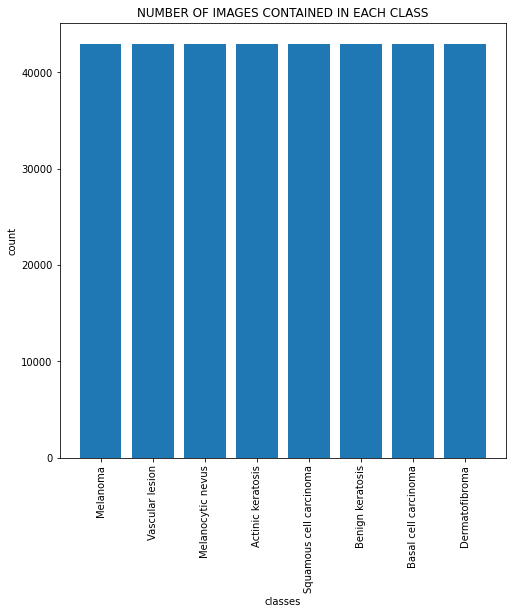

In [9]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

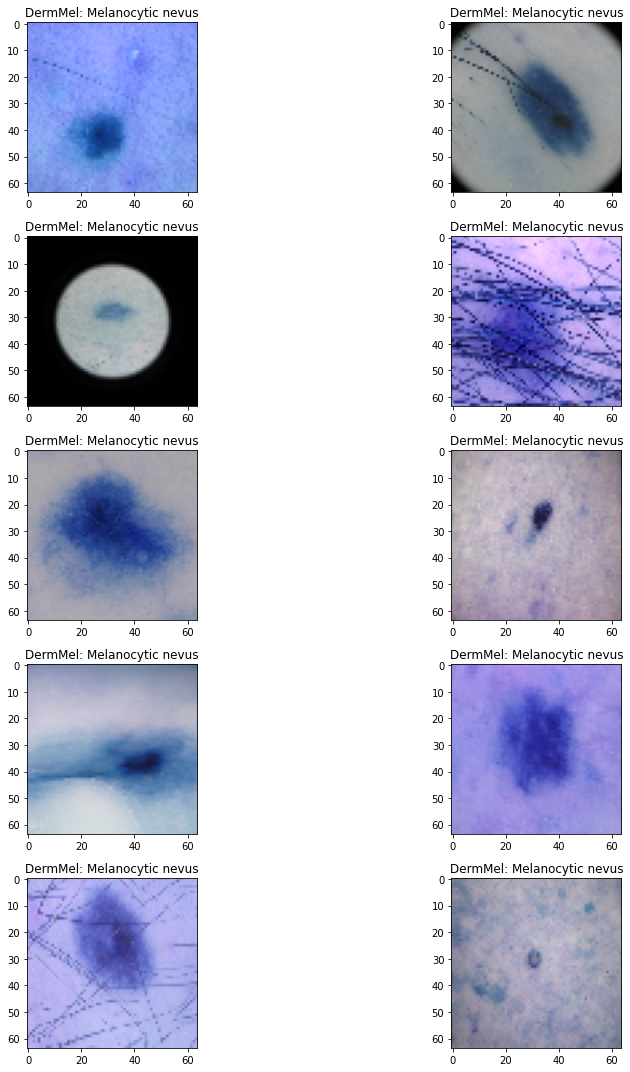

In [10]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('DermMel: '+y_data[l])
        
plt.tight_layout()

In [11]:
x_data = np.array(x_data)

y_data = np.array(y_data)

print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (42982, 64, 64, 3) and that of Y is:  (42982,)


In [12]:
le=LabelEncoder()
Y=le.fit_transform(y_data)
Y=to_categorical(Y,num_cls)
x_data = x_data/255   #standarization 
Y.shape

(42982, 8)

In [13]:
from tensorflow.keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet', 
                        include_top=False, 
                        input_shape=(64, 64, 3))

# print(conv_base.summary())

94781440/94765736 [==============================] - 4s 0us/step


In [14]:
model = Sequential()

# model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))

# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cls, activation = "softmax"))

In [15]:
# Making the conv_base NOT trainable:

for layer in conv_base.layers[:]:
    layer.trainable = False

In [16]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = SGD(lr=1e-3),
              loss='categorical_crossentropy',metrics=['acc'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2056      
Total params: 25,687,176
Trainable params: 2,099,464
Non-trainable params: 23,587,712
____________________________________

In [18]:
test_label = os.listdir('/kaggle/input/isic-2019/ISIC - 2019/test')
print(test_label)

['Melanoma', 'Vascular lesion', 'Melanocytic nevus', 'Actinic keratosis', 'Squamous cell carcinoma', 'Benign keratosis', 'Basal cell carcinoma', 'Dermatofibroma']


In [19]:
x_test =[]
y_test = []

for label in test_label:
    path = test_path.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (64,64))
        x_test.append(np.array(image_resized))
        y_test.append(label)

In [20]:
x_test = np.array(x_test)
x_test = x_test/255
y_test = np.array(y_test)
le = LabelEncoder()
y = le.fit_transform(y_test)
y = to_categorical(y,num_cls)

In [21]:
x_test.shape,y.shape

((1930, 64, 64, 3), (1930, 8))

In [22]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [23]:
History = model.fit(x_data,Y,epochs = 100, validation_data = (x_test,y),
                    verbose = 1,callbacks=[early_stop])

Epoch 1/100
1344/1344 [==============================] - 35s 19ms/step - loss: 1.4831 - acc: 0.5087 - val_loss: 1.4220 - val_acc: 0.5031
Epoch 2/100
1344/1344 [==============================] - 23s 17ms/step - loss: 1.4398 - acc: 0.5143 - val_loss: 1.4220 - val_acc: 0.5088
Epoch 3/100
1344/1344 [==============================] - 24s 18ms/step - loss: 1.4163 - acc: 0.5167 - val_loss: 1.3947 - val_acc: 0.5171
Epoch 4/100
1344/1344 [==============================] - 23s 17ms/step - loss: 1.3963 - acc: 0.5181 - val_loss: 1.3640 - val_acc: 0.5119
Epoch 5/100
1344/1344 [==============================] - 23s 17ms/step - loss: 1.3806 - acc: 0.5191 - val_loss: 1.3814 - val_acc: 0.5124
Epoch 6/100
1344/1344 [==============================] - 24s 18ms/step - loss: 1.3679 - acc: 0.5241 - val_loss: 1.3445 - val_acc: 0.5228
Epoch 7/100
1344/1344 [==============================] - 23s 17ms/step - loss: 1.3574 - acc: 0.5251 - val_loss: 1.3691 - val_acc: 0.5130
Epoch 8/100
1344/1344 [==================

In [24]:
datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_data)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
         width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(x_test)

In [25]:
History = model.fit(datagen.flow(x_data,Y, batch_size=32),
                              epochs = 100, 
                              validation_data = val_datagen.flow(x_test,y,batch_size=32),
                              verbose = 1, 
                              steps_per_epoch=x_data.shape[0] // 32,
                              callbacks=[early_stop])

Epoch 1/100
1343/1343 [==============================] - 67s 49ms/step - loss: 1.3294 - acc: 0.5285 - val_loss: 1.3229 - val_acc: 0.5269
Epoch 2/100
1343/1343 [==============================] - 64s 48ms/step - loss: 1.2957 - acc: 0.5387 - val_loss: 1.3413 - val_acc: 0.5316
Epoch 3/100
1343/1343 [==============================] - 64s 48ms/step - loss: 1.2768 - acc: 0.5478 - val_loss: 1.3112 - val_acc: 0.5321
Epoch 4/100
1343/1343 [==============================] - 65s 48ms/step - loss: 1.2665 - acc: 0.5501 - val_loss: 1.2997 - val_acc: 0.5394
Epoch 5/100
1343/1343 [==============================] - 64s 48ms/step - loss: 1.2592 - acc: 0.5544 - val_loss: 1.2990 - val_acc: 0.5430
Epoch 6/100
1343/1343 [==============================] - 64s 48ms/step - loss: 1.2538 - acc: 0.5571 - val_loss: 1.2969 - val_acc: 0.5399
Epoch 7/100
1343/1343 [==============================] - 64s 48ms/step - loss: 1.2477 - acc: 0.5576 - val_loss: 1.2941 - val_acc: 0.5363
Epoch 8/100
1343/1343 [==================

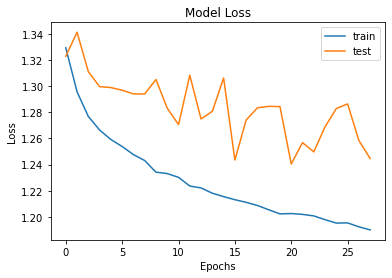

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

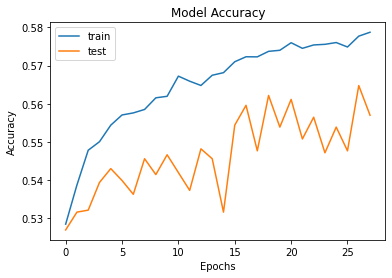

In [27]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
model.save('ResNet50_ISIC_2019.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [29]:
from tensorflow import keras
# load = keras.models.load_model('ResNet50_ISIC_2019.h5')